In [8]:
## Import libraries

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [92]:
## Load the data
df = pd.read_csv('E-com_Data.csv')

### 1. Data cleaning and Exploratory data analysis (EDA)
### 2. Customer segmentation using RFM analysis
### 3. Customer segmentation using K-Means, Hierarchial and DBSCAN
### 4. Analysis of Customer Retention rates using Cohort Analysis

In [10]:
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [11]:
df.shape

(541116, 12)

## Part 1 - EDA
1. Identifying Missing values and noise in the dataset
2. Cleaning and Visualizing the data
3. Conducting analysis by Invoice, Product and other variables

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [13]:
## CustomerID - Mandatory
## Invoice No - Frequency
## Price - Monetary
##  Date of purchase - Recency

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,404189.0,2181.909035,1252.681881,2.0,1207.0,2078.0,3291.0,4372.0
InvoieNo,537979.0,385017.572063,13426.052649,361429.0,372961.0,385706.0,396873.0,406651.0
Quantity,537979.0,9.343339,27.623322,-2003.0,1.0,3.0,10.0,3186.0
price per Unit,537979.0,378.339062,440.048823,1.0,169.0,261.0,456.0,64973.0
Price,537979.0,2161.414593,4538.487177,-10152.0,451.0,1194.0,2232.0,90400.0
Sold as set,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.shape

(541116, 12)

In [16]:
df.isnull().sum()/len(df)*100

CustomerID            25.304556
Item Code              0.579728
InvoieNo               0.579728
Date of purchase       0.579728
Quantity               0.579728
Time                   0.579728
price per Unit         0.579728
Price                  0.579728
Shipping Location      0.579728
Cancelled_status      98.457817
Reason of return      99.999446
Sold as set          100.000000
dtype: float64

In [17]:
drop_columns = ['Item Code','Quantity','Time','price per Unit','Shipping Location','Cancelled_status','Reason of return','Sold as set']
df.drop(drop_columns, axis = 1, inplace=True)

In [18]:
df.columns

Index(['CustomerID', 'InvoieNo', 'Date of purchase', 'Price'], dtype='object')

In [19]:
df.head()

,CustomerID,InvoieNo,Date of purchase,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [20]:
### Data cleaning

df.duplicated().sum()

6008

In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df.duplicated().sum()

0

In [23]:
df['Price'].min()

-10152.0

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,402859.0,2182.187224,1252.636483,2.0,1207.0,2078.0,3291.0,4372.0
InvoieNo,535107.0,385009.702116,13418.210488,361429.0,372964.0,385665.0,396811.0,406651.0
Price,535107.0,2167.848915,4547.338495,-10152.0,453.0,1200.0,2236.0,90400.0


In [25]:
### There are missing data in the dataset
df.isnull().sum()/df.isnull().count()*100

CustomerID          24.714450
InvoieNo             0.000187
Date of purchase     0.000187
Price                0.000187
dtype: float64

In [26]:
def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys = ['missing_number', 'missing_percent'])
    return missing_values[missing_values['missing_number'] > 0]

In [27]:
missing_values(df)

,missing_number,missing_percent
CustomerID,132249,0.247145
InvoieNo,1,0.000002
Date of purchase,1,0.000002
Price,1,0.000002


In [28]:
df.isnull().sum().sort_values(ascending=False)

CustomerID          132249
InvoieNo                 1
Date of purchase         1
Price                    1
dtype: int64

In [29]:
df.isnull().sum().sort_values(ascending=False)/len(df)*100

CustomerID          24.714450
InvoieNo             0.000187
Date of purchase     0.000187
Price                0.000187
dtype: float64

In [30]:
df["CustomerID"].nunique()

4349

In [31]:
df["InvoieNo"].nunique()

24928

In [32]:
df = df.dropna(subset=["CustomerID"])

In [33]:
(df.isnull().sum()/ df.isnull().count()).sort_values(ascending=False)

CustomerID          0.0
InvoieNo            0.0
Date of purchase    0.0
Price               0.0
dtype: float64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402859 entries, 0 to 537949
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CustomerID        402859 non-null  float64
 1   InvoieNo          402859 non-null  float64
 2   Date of purchase  402859 non-null  object 
 3   Price             402859 non-null  float64
dtypes: float64(3), object(1)
memory usage: 15.4+ MB


In [35]:
import datetime
df['Date of purchase'] = pd.to_datetime(df['Date of purchase'])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402859 entries, 0 to 537949
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   CustomerID        402859 non-null  float64       
 1   InvoieNo          402859 non-null  float64       
 2   Date of purchase  402859 non-null  datetime64[ns]
 3   Price             402859 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 15.4 MB


In [37]:
df = df.rename (columns = {'Date of purchase': 'Date', 'InvoieNo': 'InvoiceNo' })

In [38]:
df.columns

Index(['CustomerID', 'InvoiceNo', 'Date', 'Price'], dtype='object')

In [39]:
df.head()

,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177.0,2017-10-29,1926.0
1,4352.0,394422.0,2017-10-05,1740.0
2,4352.0,394422.0,2017-10-12,1866.0
3,4352.0,388633.0,2017-08-22,1869.0
4,4352.0,394422.0,2017-10-10,1888.0


In [40]:
df.describe()

,CustomerID,InvoiceNo,Date,Price
count,402859.000000,402859.000000,402859,402859.000000
mean,2182.187224,385642.971491,2017-07-15 14:25:02.538605056,2477.465103
min,2.000000,361429.000000,2016-12-02 00:00:00,-10152.000000
25%,1207.000000,374193.000000,2017-04-12 00:00:00,556.000000
50%,2078.000000,386934.000000,2017-08-05 00:00:00,1572.000000
75%,3291.000000,397130.000000,2017-10-26 00:00:00,2496.000000
max,4372.000000,406651.000000,2017-12-19 00:00:00,90400.000000
std,1252.636483,13106.663884,NaN,4896.268647


In [41]:
new_date = datetime.datetime(2017, 12, 20)
new_date

datetime.datetime(2017, 12, 20, 0, 0)

In [42]:
df['CustomerID'] == 4352.0

0         False
1          True
2          True
3          True
4          True
          ...  
537945    False
537946    False
537947    False
537948    False
537949    False
Name: CustomerID, Length: 402859, dtype: bool

## Customer segmentation using RFM analysis

## RFM Analysis : is a marketing techniques and method used to evaluate customer behavior
RFM stands for Recency, Frequency, and Monetary

* Recency: Indicates how recently a customer has made a purchase. Customer who have purchased more recently have a higher recency score.

* Frequency: Represents how many times a customer has made a purchase within a specific time period(typically within a year). Customer who purchase more frequently have a higher frequency score

* Monetary: Refers to the total amount a customer has spent within a specific time period. Customer who spend more have a higher monetary score.

A Score of 5 represent the best customers (most recent, most frequent, and highest spending)

A score of 1 represents the lease engaged customers.

In [43]:
RFMApproach = df.groupby('CustomerID').agg({'Date': lambda x: (new_date - x.max()).days, 'InvoiceNo': lambda x: x.count(), 'Price': lambda x: x.sum()})
RFMApproach.rename(columns = {'Date': 'Recency', 'InvoiceNo': 'Frequency', 'Price': 'Monetary'}, inplace = True)
RFMApproach.reset_index()

,CustomerID,Recency,Frequency,Monetary
0,2.0,4,181,550416.0
1,3.0,77,27,257404.0
2,4.0,19,72,176613.0
3,5.0,311,16,41976.0
4,6.0,37,84,151822.0
...,...,...,...,...
4344,4368.0,278,10,20480.0
4345,4369.0,181,7,10774.0
4346,4370.0,9,13,24962.0
4347,4371.0,4,751,279720.0


In [44]:
RFMApproach.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4349.0,93.299379,100.701315,1.0,18.0,51.0,144.0,381.0
Frequency,4349.0,92.632559,230.742279,1.0,17.0,42.0,101.0,7919.0
Monetary,4349.0,229493.932881,855668.518674,-50372.0,38140.0,83635.0,205444.0,35472089.0


In [45]:
## Split the data into 4 segments on the basis of Quantile Method
quantiles = RFMApproach.quantile(q=[0.25, 0.50, 0.75])
quantiles = quantiles.to_dict() ## The resulting quantiles dictionary will look something like:

quantiles

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 144.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetary': {0.25: 38140.0, 0.5: 83635.0, 0.75: 205444.0}}

In [46]:
## def Recency_value(x, feature_name, quantiles_dict):

def Recency_value (x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x<= d[p][0.50]:
        return 2
    elif x<= d[p][0.75]:
        return 3
    else:
        return 4

In [47]:
def Frequency_monetary_value (x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x<= d[p][0.50]:
        return 3
    elif x<= d[p][0.75]:
        return 2
    else:
        return 1

In [48]:
### This creates a new column 'R','F','M'in the RFMApproach DataFrame.This applies the Recency_value function to each value in the 'Recency' column.
## Recency_value is a custom function that is used to assign a score or category to each recency value.

RFMApproach['R'] = RFMApproach['Recency'].apply(Recency_value,args=('Recency',quantiles))
RFMApproach['F'] = RFMApproach['Frequency'].apply(Frequency_monetary_value,args=('Frequency',quantiles))
RFMApproach['M'] = RFMApproach['Monetary'].apply(Frequency_monetary_value,args=('Monetary',quantiles))

In [49]:
## RFMApproach.reset_index() is a pandas DataFrame method that resets the index of the DataFrame.
RFMApproach.reset_index()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,2.0,4,181,550416.0,1,1,1
1,3.0,77,27,257404.0,3,3,1
2,4.0,19,72,176613.0,2,2,2
3,5.0,311,16,41976.0,4,4,3
4,6.0,37,84,151822.0,2,2,2
...,...,...,...,...,...,...,...
4344,4368.0,278,10,20480.0,4,4,4
4345,4369.0,181,7,10774.0,4,4,4
4346,4370.0,9,13,24962.0,1,4,4
4347,4371.0,4,751,279720.0,1,1,1


In [50]:
## Creating a new column RFM by adding the sum of R, F and M columns
RFMApproach['RFM'] = RFMApproach[['R','F','M']].sum(axis = 1)
RFMApproach.reset_index()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM
0,2.0,4,181,550416.0,1,1,1,3
1,3.0,77,27,257404.0,3,3,1,7
2,4.0,19,72,176613.0,2,2,2,6
3,5.0,311,16,41976.0,4,4,3,11
4,6.0,37,84,151822.0,2,2,2,6
...,...,...,...,...,...,...,...,...
4344,4368.0,278,10,20480.0,4,4,4,12
4345,4369.0,181,7,10774.0,4,4,4,12
4346,4370.0,9,13,24962.0,1,4,4,9
4347,4371.0,4,751,279720.0,1,1,1,3


In [51]:
RFMApproach.to_csv('RFMApproach.csv')

In [52]:
RFMApproach['RFM'].value_counts()

RFM
10    508
3     471
7     461
9     458
8     447
5     439
12    410
6     405
11    380
4     370
Name: count, dtype: int64

In [53]:
## Segmenting the customer based on Loyal
## The pd.qcut() function splits the data into equal-sized buckets (quartiles in this case)

Loyality_level = ['Platinum', 'Gold', 'Silver', 'Bronze']
score_cuts = pd.qcut(RFMApproach.RFM, q=4, labels = Loyality_level)
RFMApproach['Loyality_level'] = score_cuts.values
RFMApproach = RFMApproach.reset_index()
RFMApproach

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,Loyality_level
0,2.0,4,181,550416.0,1,1,1,3,Platinum
1,3.0,77,27,257404.0,3,3,1,7,Gold
2,4.0,19,72,176613.0,2,2,2,6,Gold
3,5.0,311,16,41976.0,4,4,3,11,Bronze
4,6.0,37,84,151822.0,2,2,2,6,Gold
...,...,...,...,...,...,...,...,...,...
4344,4368.0,278,10,20480.0,4,4,4,12,Bronze
4345,4369.0,181,7,10774.0,4,4,4,12,Bronze
4346,4370.0,9,13,24962.0,1,4,4,9,Silver
4347,4371.0,4,751,279720.0,1,1,1,3,Platinum


In [54]:
RFMApproach['Loyality_level'].value_counts()

Loyality_level
Gold        1313
Platinum    1280
Silver       966
Bronze       790
Name: count, dtype: int64

In [55]:
RFMApproach.to_csv('Loyality_level.csv')

In [56]:
RFMApproach.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R', 'F', 'M', 'RFM',
       'Loyality_level'],
      dtype='object')

In [57]:
## Creates groups based on loyalty segment. Specifies columns to analyze
## Aggregates data and then converts group by index into Regular columns

final_report = RFMApproach.groupby('Loyality_level')[['Recency','Frequency','Monetary','CustomerID']].agg({'Recency':'sum',
                                                                                                          'Frequency':'sum',
                                                                                                          'Monetary':'sum',
                                                                                                          'CustomerID':'nunique'}).reset_index()

In [58]:
final_report

,Loyality_level,Recency,Frequency,Monetary,CustomerID
0,Platinum,25971,294629,763311232.0,1280
1,Gold,84142,75914,165998506.0,1313
2,Silver,121714,23728,50215730.1,966
3,Bronze,173932,8588,18543646.0,790


In [59]:
final_report = final_report.rename(columns = {'CustomerID':'NoOfBuyers'})

In [60]:
final_report

,Loyality_level,Recency,Frequency,Monetary,NoOfBuyers
0,Platinum,25971,294629,763311232.0,1280
1,Gold,84142,75914,165998506.0,1313
2,Silver,121714,23728,50215730.1,966
3,Bronze,173932,8588,18543646.0,790


In [61]:
final_report['Percent'] = round(final_report['NoOfBuyers']/final_report.NoOfBuyers.sum()*100,2)

In [62]:
final_report

,Loyality_level,Recency,Frequency,Monetary,NoOfBuyers,Percent
0,Platinum,25971,294629,763311232.0,1280,29.43
1,Gold,84142,75914,165998506.0,1313,30.19
2,Silver,121714,23728,50215730.1,966,22.21
3,Bronze,173932,8588,18543646.0,790,18.17


In [63]:
final_report_updated = final_report[['Loyality_level','NoOfBuyers','Percent']]

In [64]:
final_report_updated

,Loyality_level,NoOfBuyers,Percent
0,Platinum,1280,29.43
1,Gold,1313,30.19
2,Silver,966,22.21
3,Bronze,790,18.17


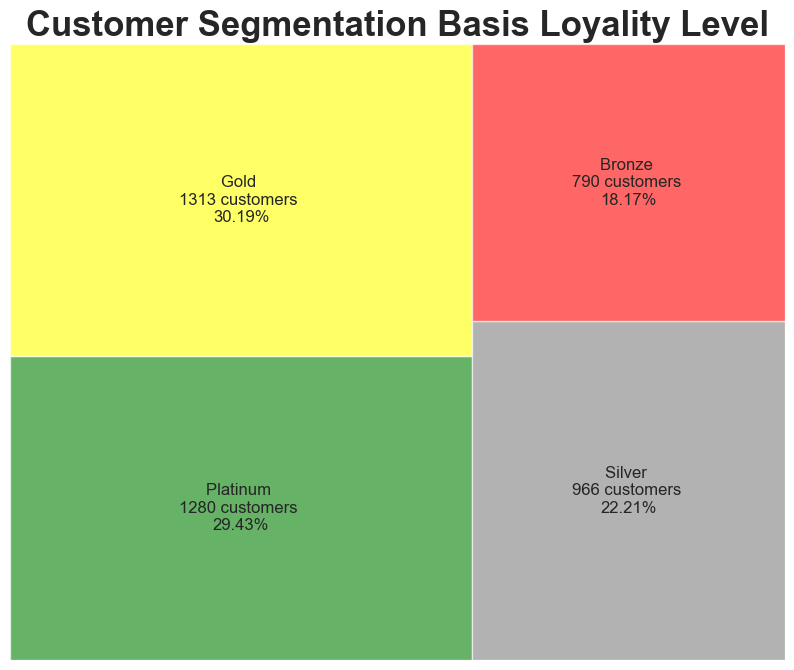

In [65]:
## Squarify which is mainly used to plot a Treemap
import squarify
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(10,8)
colors_dics = {'platinum':'green', 'gold':'yellow', 'silver':'gray', 'bronze':'red'}
squarify.plot(sizes=final_report_updated['NoOfBuyers'], color = colors_dics.values(), 
              label = ['{} \n{:0.0f} customers \n{}%'.format(*final_report_updated.iloc[i]) for i in range(0, len(final_report_updated))], alpha=0.6)
plt.title("Customer Segmentation Basis Loyality Level", fontsize=25, fontweight="bold")
plt.axis('off')
plt.show()

## Unsupervised Machine learning - Segmentation/Clustering/Grouping

In [66]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import scipy.cluster.hierarchy as sch
from datetime import datetime

In [68]:
RFMApproach.reset_index()

,index,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,Loyality_level
0,0,2.0,4,181,550416.0,1,1,1,3,Platinum
1,1,3.0,77,27,257404.0,3,3,1,7,Gold
2,2,4.0,19,72,176613.0,2,2,2,6,Gold
3,3,5.0,311,16,41976.0,4,4,3,11,Bronze
4,4,6.0,37,84,151822.0,2,2,2,6,Gold
...,...,...,...,...,...,...,...,...,...,...
4344,4344,4368.0,278,10,20480.0,4,4,4,12,Bronze
4345,4345,4369.0,181,7,10774.0,4,4,4,12,Bronze
4346,4346,4370.0,9,13,24962.0,1,4,4,9,Silver
4347,4347,4371.0,4,751,279720.0,1,1,1,3,Platinum


In [69]:
RFMApproach.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R', 'F', 'M', 'RFM',
       'Loyality_level'],
      dtype='object')

In [70]:
rfm_df = RFMApproach[['Recency', 'Frequency', 'Monetary']]

In [71]:
rfm_df.head()

,Recency,Frequency,Monetary
0,4,181,550416.0
1,77,27,257404.0
2,19,72,176613.0
3,311,16,41976.0
4,37,84,151822.0


In [72]:
## Standardization
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df)

In [73]:
rfm_scaled

array([[-0.88687668,  0.38301434,  0.37509732],
       [-0.16187726, -0.28447368,  0.0326216 ],
       [-0.73790419, -0.08942848, -0.06180783],
       ...,
       [-0.83721918, -0.34515441, -0.23905922],
       [-0.88687668,  2.85358691,  0.05870479],
       [-0.48961672, -0.10676583,  0.0320933 ]])

# Part 1 - Customer Segmentation (KMeans)
### Finding Optimal clusters using Elbow Method

### The elbow method is a popular technique used to determine the optimal number of clusters (k) in KMeans clustering. The idea is to run KMeans for a range of cluster numbers and then plot a curve of a performance metric — typically the Within-Cluster Sum of Squares (WCSS) — against the number of clusters. The “elbow” point on the curve indicates the optimal k.

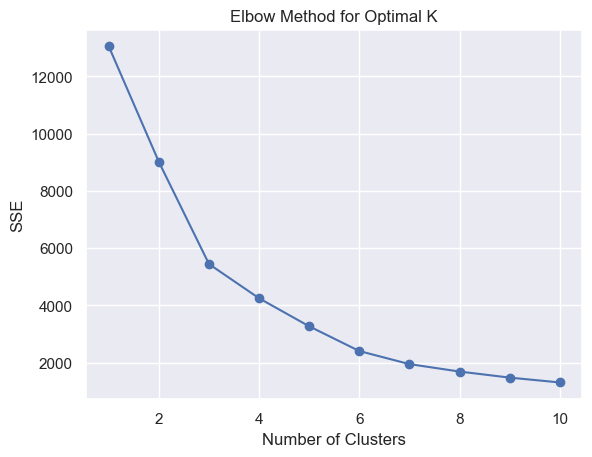

In [74]:
## Let's implement the elbow method using the Sum of Squared Errors (SSE), also known as inertia_ in scikit-learn.
## To complete the elbow method, you just need to plot the SSE values to visualize the “elbow” point. Here's how you can finish it:

sse = []
for k in range(1,11):
    kmeans= KMeans(n_clusters=k,random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1,11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title("Elbow Method for Optimal K")
plt.show()

In [75]:
kmeans = KMeans(n_clusters=6,random_state=42)
rfm_df['KMeans_Cluster'] = kmeans.fit_predict(rfm_scaled)

In [76]:
rfm_df

,Recency,Frequency,Monetary,KMeans_Cluster
0,4,181,550416.0,5
1,77,27,257404.0,5
2,19,72,176613.0,5
3,311,16,41976.0,0
4,37,84,151822.0,5
...,...,...,...,...
4344,278,10,20480.0,0
4345,181,7,10774.0,0
4346,9,13,24962.0,5
4347,4,751,279720.0,1


In [77]:
rfm_df['KMeans_Cluster'].value_counts(normalize=True)

KMeans_Cluster
5    0.667740
0    0.244194
1    0.083238
3    0.003679
4    0.000920
2    0.000230
Name: proportion, dtype: float64

## Hierarchical Clustering

Hierarchical Clustering is an unsupervised clustering algorithm that builds a hierarchy of clusters using either a bottom-up (agglomerative) or top-down (divisive) approach. The most commonly used is Agglomerative Hierarchical Clustering.

1. Plot dendrogram to find optimal k.
2. Use AgglomerativeClustering with your chosen k.
3. Analyze cluster labels or visualize results.

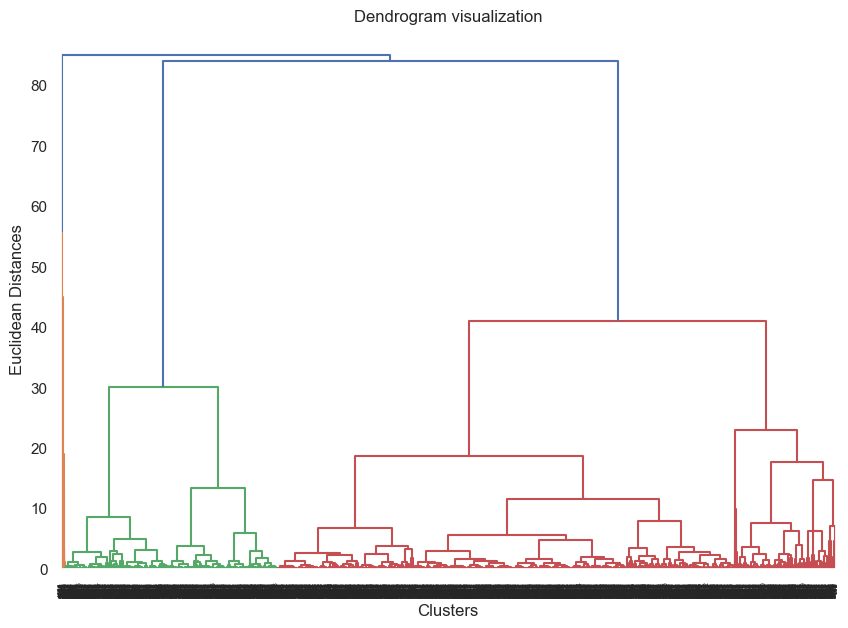

In [78]:
## ward – minimizes the variance within clusters.

linked = linkage(rfm_scaled, method='ward')
plt.figure(figsize=(10,7))
dendrogram(linked)
plt.title("Dendrogram visualization")
plt.xlabel("Clusters")
plt.ylabel("Euclidean Distances")
plt.show()

In [79]:
## linkage(...): Builds the hierarchical clustering tree using the Ward method (minimizes variance).
## fcluster(...): Cuts the dendrogram at a height to form 6 clusters, using the maxclust criterion.
## criterion='maxclust' means: "Give me exactly 6 clusters."

rfm_df['Hierarchical_Cluster'] = fcluster(linked, 6, criterion='maxclust')

In [80]:
rfm_df

,Recency,Frequency,Monetary,KMeans_Cluster,Hierarchical_Cluster
0,4,181,550416.0,5,6
1,77,27,257404.0,5,5
2,19,72,176613.0,5,5
3,311,16,41976.0,0,4
4,37,84,151822.0,5,5
...,...,...,...,...,...
4344,278,10,20480.0,0,4
4345,181,7,10774.0,0,4
4346,9,13,24962.0,5,5
4347,4,751,279720.0,1,6


In [81]:
rfm_df['Hierarchical_Cluster'].value_counts(normalize=True)

Hierarchical_Cluster
5    0.589561
4    0.275236
6    0.130145
2    0.003909
1    0.000920
3    0.000230
Name: proportion, dtype: float64

In [82]:
### AgglomerativeClustering

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
labels = hc.fit_predict(rfm_scaled)

In [83]:
rfm_df['HCluster'] = labels

In [84]:
rfm_df.head()

,Recency,Frequency,Monetary,KMeans_Cluster,Hierarchical_Cluster,HCluster
0,4,181,550416.0,5,6,2
1,77,27,257404.0,5,5,5
2,19,72,176613.0,5,5,5
3,311,16,41976.0,0,4,0
4,37,84,151822.0,5,5,5


In [85]:
rfm_df['HCluster'].value_counts(normalize=True)

HCluster
5    0.589561
0    0.275236
2    0.130145
1    0.003909
3    0.000920
4    0.000230
Name: proportion, dtype: float64

### Let's visualize the clusters from Hierarchical Clustering using PCA to reduce the features to 2 dimensions. This will let you see how well the clusters are separated.

## DBSCAN
### DBSCAN (Density-Based Spatial Clustering of Applications with Noise) — a clustering method that doesn’t require specifying the number of clusters in advance and can detect noise/outliers.

In [86]:
dbscan = DBSCAN(eps=1.5, min_samples=5)

## eps=1.5: Maximum distance between two points to be considered neighbors.
### min_samples=5: Minimum number of points required to form a dense region (a core point).
### fit_predict(...): Fits the model and returns cluster labels.
## -1 label: Points labeled as -1 are considered noise or outliers.

rfm_df['DBSCAN_Cluster'] = dbscan.fit_predict(rfm_scaled)
rfm_df

,Recency,Frequency,Monetary,KMeans_Cluster,Hierarchical_Cluster,HCluster,DBSCAN_Cluster
0,4,181,550416.0,5,6,2,0
1,77,27,257404.0,5,5,5,0
2,19,72,176613.0,5,5,5,0
3,311,16,41976.0,0,4,0,0
4,37,84,151822.0,5,5,5,0
...,...,...,...,...,...,...,...
4344,278,10,20480.0,0,4,0,0
4345,181,7,10774.0,0,4,0,0
4346,9,13,24962.0,5,5,5,0
4347,4,751,279720.0,1,6,2,0


In [87]:
rfm_df['DBSCAN_Cluster'].value_counts(normalize=True)

DBSCAN_Cluster
 0    0.995631
-1    0.004369
Name: proportion, dtype: float64

## Cohort Analysis for Customer Retention

Cohort analysis is a powerful way to understand customer retention over time — particularly how long customers continue to engage or make purchases after their first interaction. Then we will have to group those customer together for better analysis


Summary
Cohort analysis allows you to:
1. How long do users stay active after joining?
2. Track how well you retain customers from different signup months.
3. Identify churn points (e.g., Month 2 drop-offs).

Compare different acquisition campaigns.

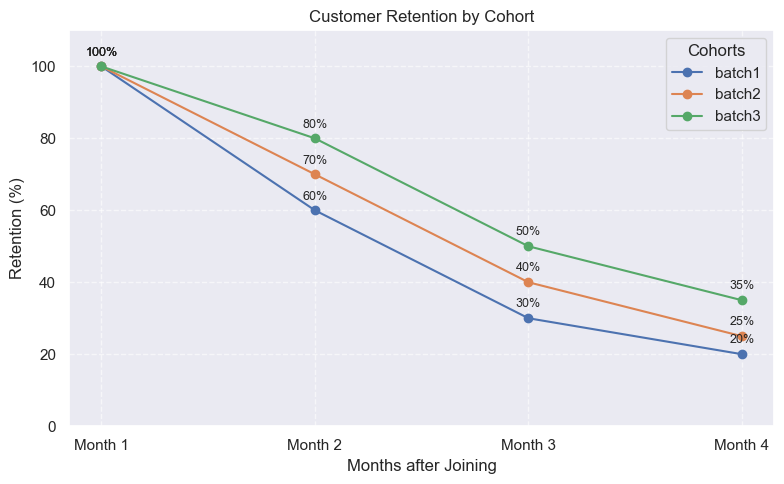

In [88]:
cohorts = ['batch1', 'batch2', 'batch3']
months = ['Month 1', 'Month 2', 'Month 3', 'Month 4']
retention_data = [
    [100, 60, 30, 20],
    [100, 70, 40, 25],
    [100, 80, 50, 35],
]

plt.figure(figsize=(8, 5))

for i, cohort in enumerate(cohorts):
    plt.plot(months, retention_data[i], marker='o', label=cohort)
    for j, value in enumerate(retention_data[i]):
        plt.text(j, value + 3, f"{value}%", ha='center', fontsize=9)

plt.title("Customer Retention by Cohort")
plt.xlabel("Months after Joining")
plt.ylabel("Retention (%)")
plt.ylim(0, 110)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Cohorts')
plt.tight_layout()
plt.show()

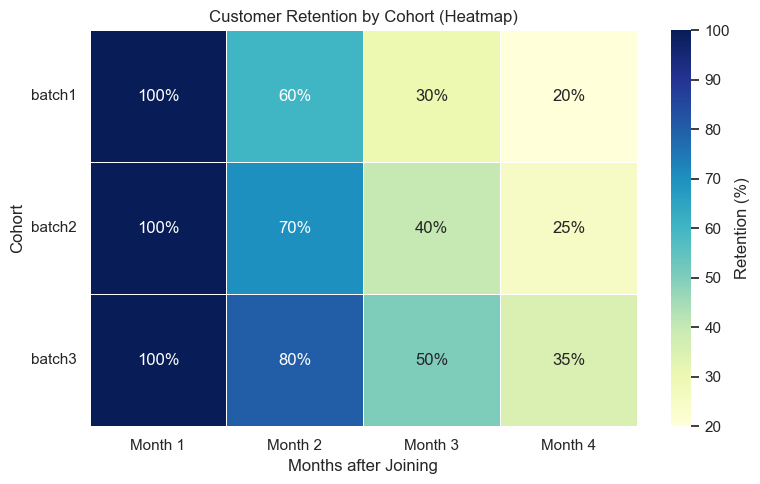

In [89]:
## With Dummy Data

# Data
cohorts = ['batch1', 'batch2', 'batch3']
months = ['Month 1', 'Month 2', 'Month 3', 'Month 4']
retention_data = [
    [100, 60, 30, 20],
    [100, 70, 40, 25],
    [100, 80, 50, 35],
]

# Convert to DataFrame
retention_df = pd.DataFrame(retention_data, index=cohorts, columns=months)

# Format annotations as strings with %
annotations = retention_df.applymap(lambda x: f'{x}%')

# Plot heatmap with formatted annotations
plt.figure(figsize=(8, 5))
sns.heatmap(
    retention_df,
    annot=annotations, fmt='', cmap="YlGnBu", linewidths=0.5,
    cbar_kws={"label": "Retention (%)"}
)
plt.title("Customer Retention by Cohort (Heatmap)")
plt.xlabel("Months after Joining")
plt.ylabel("Cohort")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [90]:
df.head()

,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177.0,2017-10-29,1926.0
1,4352.0,394422.0,2017-10-05,1740.0
2,4352.0,394422.0,2017-10-12,1866.0
3,4352.0,388633.0,2017-08-22,1869.0
4,4352.0,394422.0,2017-10-10,1888.0


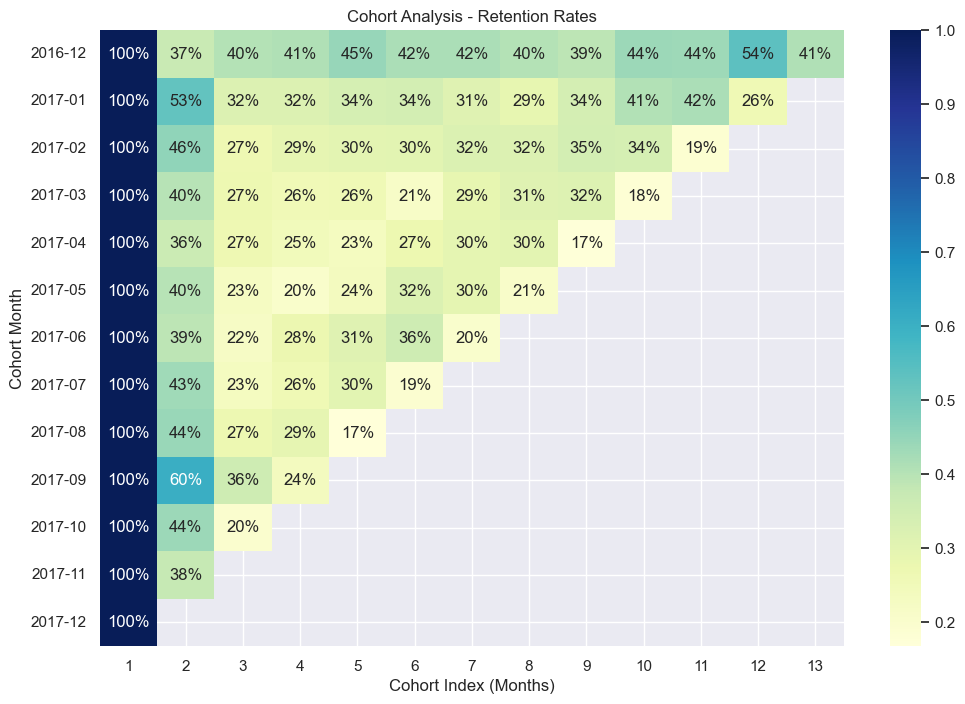

In [94]:
### Converting Purchase Dates:

df['Date'] = pd.to_datetime(df['Date of purchase'])
df['Month'] = df['Date'].dt.to_period('M')

## Assigning Cohort Month:
df['CohortMonth'] = df.groupby('CustomerID')['Date'].transform('min').dt.to_period('M')

## Calculating Cohort Index:
def cohort_index(df):
    year_diff = df['Month'].dt.year - df['CohortMonth'].dt.year
    month_diff = df['Month'].dt.month - df['CohortMonth'].dt.month
    return year_diff * 12 + month_diff + 1

df['CohortIndex'] = cohort_index(df)

cohort_data = df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()

cohort_counts = cohort_data.pivot_table(index='CohortMonth', columns='CohortIndex', values='CustomerID')

# Creating Pivot Table and Retention Matrix:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)

plt.figure(figsize=(12,8))
sns.heatmap(retention, annot=True, fmt='.0%', cmap='YlGnBu')
plt.title('Cohort Analysis - Retention Rates')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index (Months)')
plt.show()

In [95]:
### A clean retention matrix where:
## Rows = cohorts (e.g., first purchase month)
## Columns = months since first purchase
## Values = % of customers who returned